In [1]:
import anndata
import numpy
import os
import pandas
import scanpy

/usr/lib/python3/dist-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
scanpy.settings.verbosity = 3

In [3]:
quantification='expected_count'

In [4]:
ad = scanpy.read_h5ad('paper_analysis_vdir/C1_mouse_forelimb_{}.h5ad'.format(quantification))

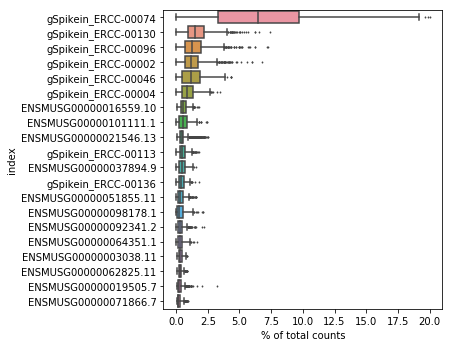

In [5]:
scanpy.pl.highest_expr_genes(ad, n_top=20)

In [ ]:
gSpikein_ERCC-00074

In [6]:
scanpy.pp.filter_cells(ad, min_genes=200)
scanpy.pp.filter_genes(ad, min_cells=10)

filtered out 44469 genes that are detected in less than 10 cells


In [14]:
spikes = ad.var['gene_id'].str.startswith('gSpikein_')
ad.obs['percent_spike'] = numpy.sum(
    ad[:, spikes].X, axis=1) / numpy.sum(ad.X, axis=1)


In [7]:
mito_genes = ad.var['gene_name'].str.startswith('mt-')
ad.obs['percent_mito'] = numpy.sum(
    ad[:, mito_genes].X, axis=1) / numpy.sum(ad.X, axis=1)
# add the total counts per cell as observations-annotation to adata
ad.obs['n_counts'] = ad.X.sum(axis=1)

In [18]:
numpy.median(ad.obs['n_counts'])

1157340.8

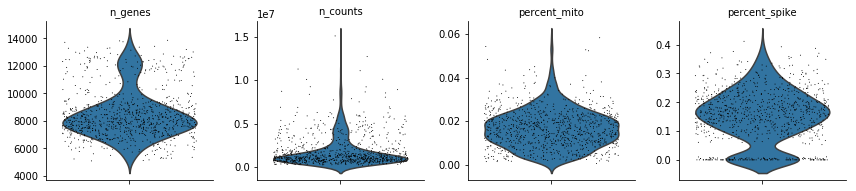

In [15]:
scanpy.pl.violin(ad, ['n_genes', 'n_counts', 'percent_mito', 'percent_spike'], jitter=0.4, multi_panel=True)

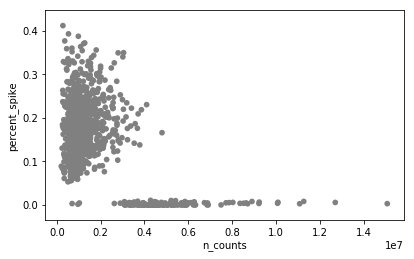

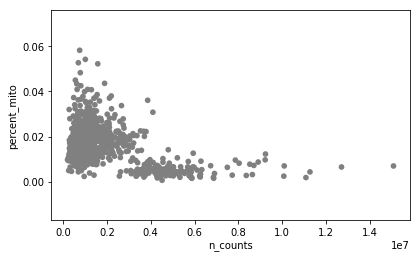

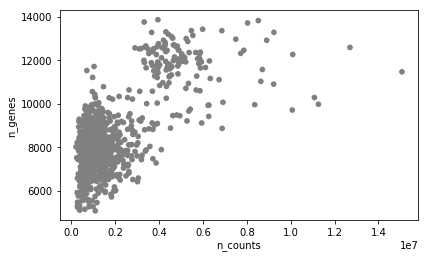

In [16]:
scanpy.pl.scatter(ad, x='n_counts', y='percent_spike')
scanpy.pl.scatter(ad, x='n_counts', y='percent_mito')
scanpy.pl.scatter(ad, x='n_counts', y='n_genes')

In [17]:
ad.X.shape

(920, 25221)

In [19]:
scanpy.pp.normalize_per_cell(ad, counts_per_cell_after=1e6)

In [20]:
ad.raw = ad
scanpy.pp.log1p(ad)


In [21]:
scanpy.pp.highly_variable_genes(ad, min_mean=0.0125, max_mean=3, min_disp=0.5)

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


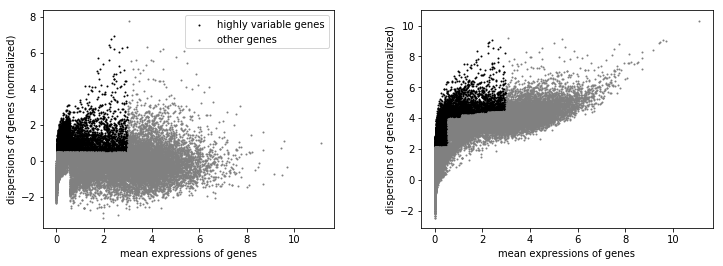

In [22]:
scanpy.pl.highly_variable_genes(ad)

In [24]:
ad = ad[:, ad.var['highly_variable']]

In [27]:
scanpy.pp.regress_out(ad, ['n_counts', 'percent_mito'])

regressing out ['n_counts', 'percent_mito']


/usr/lib/python3/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


    finished (0:00:17.08)


In [28]:
scanpy.pp.scale(ad, max_value=10)

# Principal Components Analysis

In [29]:
scanpy.tl.pca(ad, svd_solver='arpack')

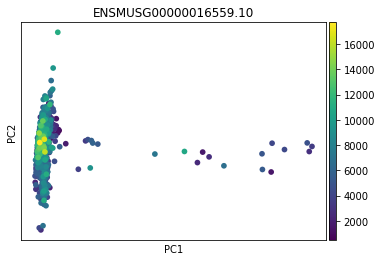

In [39]:
scanpy.pl.pca(ad, color='ENSMUSG00000016559.10')

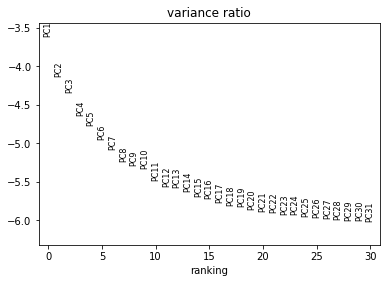

In [35]:
scanpy.pl.pca_variance_ratio(ad, log=True)

In [36]:
scanpy.pp.neighbors(ad, n_neighbors=4, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished (0:00:04.96) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [37]:
scanpy.tl.umap(ad)

computing UMAP
    finished (0:00:03.49) --> added
    'X_umap', UMAP coordinates (adata.obsm)


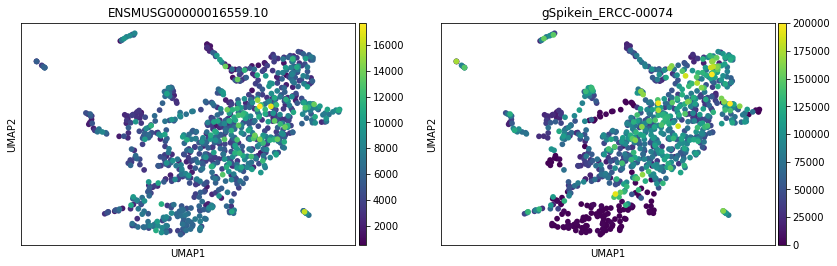

In [40]:
scanpy.pl.umap(ad, color=['ENSMUSG00000016559.10', 'gSpikein_ERCC-00074'])

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = index
18044_C6     17327_A10
18044_C7     17327_A11
18252_B1     17327_A12
18252_B10     17327_A2
18044_C8      17327_A3
18252_B11     17327_A4
18044_C9      17327_A5
18045_D1      17327_A7
18045_D10     17327_A8
18043_B12     17327_A9
18252_B12     17328_B1
18045_D11    17328_B11
18045_D12    17328_B12
18045_D2      17328_B4
18252_B2      17328_B5
18045_D4      17328_B6
18252_B3      17328_B8
18252_B4      17329_C1
18252_B5     17329_C10
18045_D5      17329_C2
18045_D6      17329_C4
18252_B8      17329_C5
18045_D7      17329_C6
18045_D8      17329_C7
18252_B9      17329_C8
18253_C1      17329_C9
18046_E1      17330_D1
18046_E10    17330_D12
18046_E2      17330_D2
18253_C10     17330_D3
               ...    
20047_D5      20046_C6
20047_D6      20046_C9
20047_D9      20047_D1
20048_E1     20047_D10
18251_A4     20047_D11
20048_E10    20047_D12
20048_E11     20047_D2
20048_E12     20047_D3
20048_E2      20047_D4
18251_A5      20047_D5
18317_G1      20047_D6
20048_E3      20047_D9
20048_E4      20048_E1
18251_A6     20048_E10
18314_D10    20048_E11
18314_D11    20048_E12
20048_E5      20048_E2
20048_E6      20048_E3
20048_E9      20048_E4
18251_A7      20048_E5
20049_F1      20048_E6
20049_F2      20048_E9
20049_F3      20049_F1
20049_F4      20049_F2
18314_D12     20049_F3
20049_F5      20049_F4
20049_F6      20049_F5
18251_A8      20049_F6
20049_F7      20049_F7
20049_F8      20049_F8
Name: CellType, Length: 920, dtype: object.

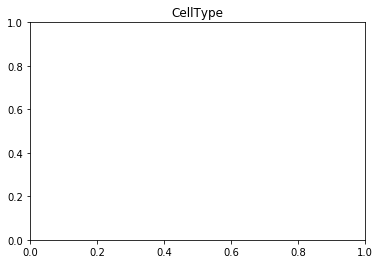

In [16]:
scanpy.tl.draw_graph(ad)

scanpy.pl.draw_graph(ad, color='CellType')

In [13]:
scanpy.pl.draw_graph?